# Backeting Investment Strategies

### Importing the Data

In [65]:
import pandas as pd

In [66]:
pd.read_csv("dji.csv").info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3333 non-null   object 
 1   Open       3333 non-null   float64
 2   High       3333 non-null   float64
 3   Low        3333 non-null   float64
 4   Close      3333 non-null   float64
 5   Adj Close  3333 non-null   float64
 6   Volume     3333 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 182.4+ KB


In [67]:
data = pd.read_csv("dji.csv", parse_dates=["Date"], index_col="Date")

In [68]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-01-03,12459.540039,12580.349609,12404.820312,12474.519531,12474.519531,327200000
2007-01-04,12473.160156,12510.410156,12403.860352,12480.690430,12480.690430,259060000
2007-01-05,12480.049805,12480.129883,12365.410156,12398.009766,12398.009766,235220000
2007-01-08,12392.009766,12445.919922,12337.370117,12423.490234,12423.490234,223500000
2007-01-09,12424.769531,12466.429688,12369.169922,12416.599609,12416.599609,225190000
...,...,...,...,...,...,...
2020-03-24,19722.189453,20737.699219,19649.250000,20704.910156,20704.910156,799340000
2020-03-25,21050.339844,22019.929688,20538.339844,21200.550781,21200.550781,796320000
2020-03-26,21468.380859,22595.060547,21427.099609,22552.169922,22552.169922,705180000


In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3333 entries, 2007-01-03 to 2020-03-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3333 non-null   float64
 1   High       3333 non-null   float64
 2   Low        3333 non-null   float64
 3   Close      3333 non-null   float64
 4   Adj Close  3333 non-null   float64
 5   Volume     3333 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 182.3 KB


In [70]:
df = data.loc["2010-01-01":"2020-03-31", "Close"].to_frame()

In [71]:
df

,Close
Date,
2010-01-04,10583.959961
2010-01-05,10572.019531
2010-01-06,10573.679688
2010-01-07,10606.860352
2010-01-08,10618.190430
...,...
2020-03-24,20704.910156
2020-03-25,21200.550781
2020-03-26,22552.169922


### Data Visualisation & Returns

In [72]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.style.use("seaborn")

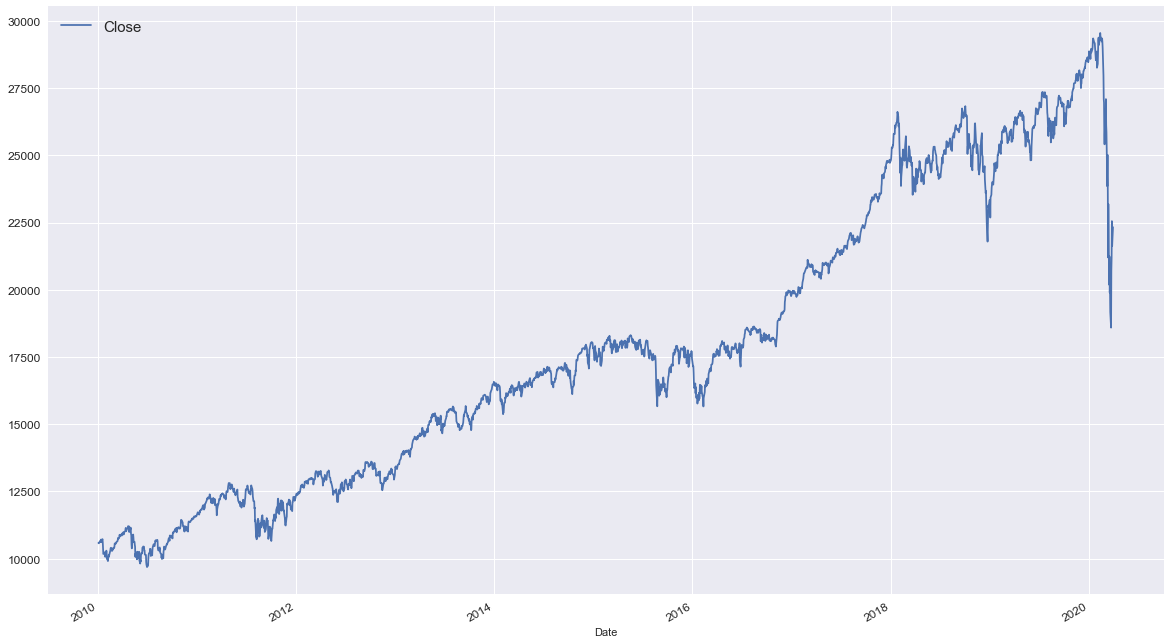

In [73]:
df.plot(figsize=(20,12), fontsize=12)
plt.legend(fontsize=15)
plt.show()

In [74]:
df["Return"] = df.pct_change()

In [75]:
df

,Close,Return
Date,,
2010-01-04,10583.959961,NaN
2010-01-05,10572.019531,-0.001128
2010-01-06,10573.679688,0.000157
2010-01-07,10606.860352,0.003138
2010-01-08,10618.190430,0.001068
...,...,...
2020-03-24,20704.910156,0.113650
2020-03-25,21200.550781,0.023938
2020-03-26,22552.169922,0.063754


In [76]:
df.dropna(inplace=True)

In [77]:
df

,Close,Return
Date,,
2010-01-05,10572.019531,-0.001128
2010-01-06,10573.679688,0.000157
2010-01-07,10606.860352,0.003138
2010-01-08,10618.190430,0.001068
2010-01-11,10663.990234,0.004313
...,...,...
2020-03-24,20704.910156,0.113650
2020-03-25,21200.550781,0.023938
2020-03-26,22552.169922,0.063754


In [78]:
df

,Close,Return
Date,,
2010-01-05,10572.019531,-0.001128
2010-01-06,10573.679688,0.000157
2010-01-07,10606.860352,0.003138
2010-01-08,10618.190430,0.001068
2010-01-11,10663.990234,0.004313
...,...,...
2020-03-24,20704.910156,0.113650
2020-03-25,21200.550781,0.023938
2020-03-26,22552.169922,0.063754


<AxesSubplot:xlabel='Date'>

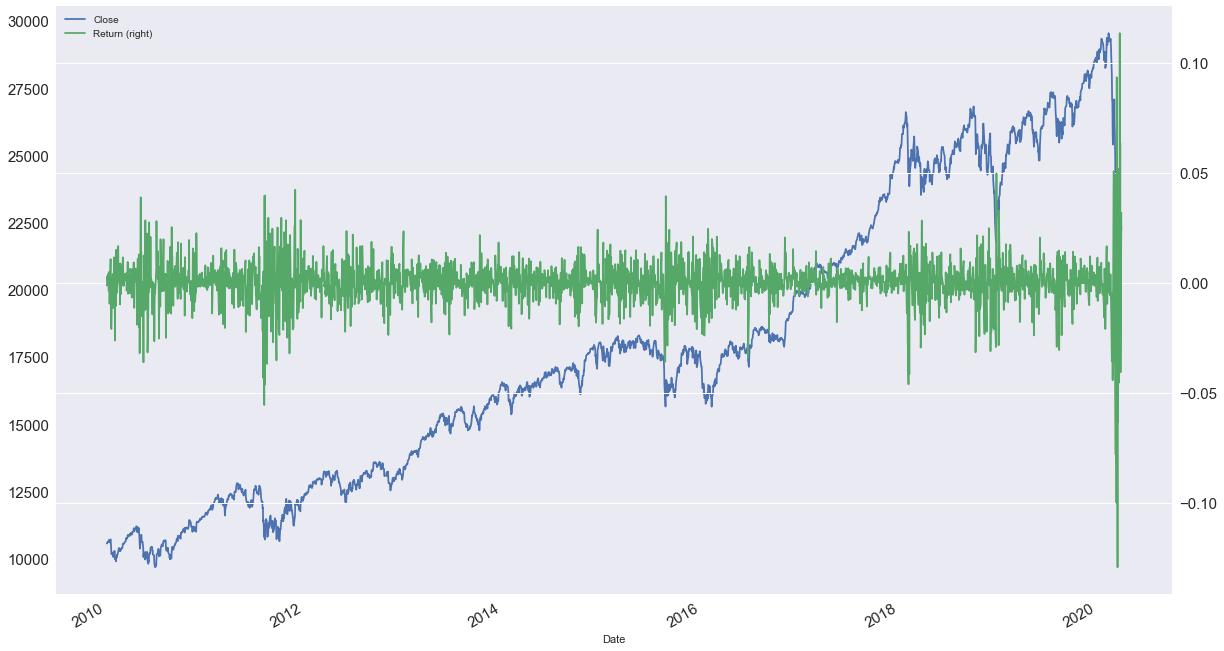

In [79]:
df.plot(figsize=(20,12),  secondary_y="Return", mark_right = True, fontsize=15) # 

In [80]:
df.rename(columns={"Close":"DJI_Close", "Return":"DJI_Return"}, inplace=True)

<AxesSubplot:xlabel='Date'>

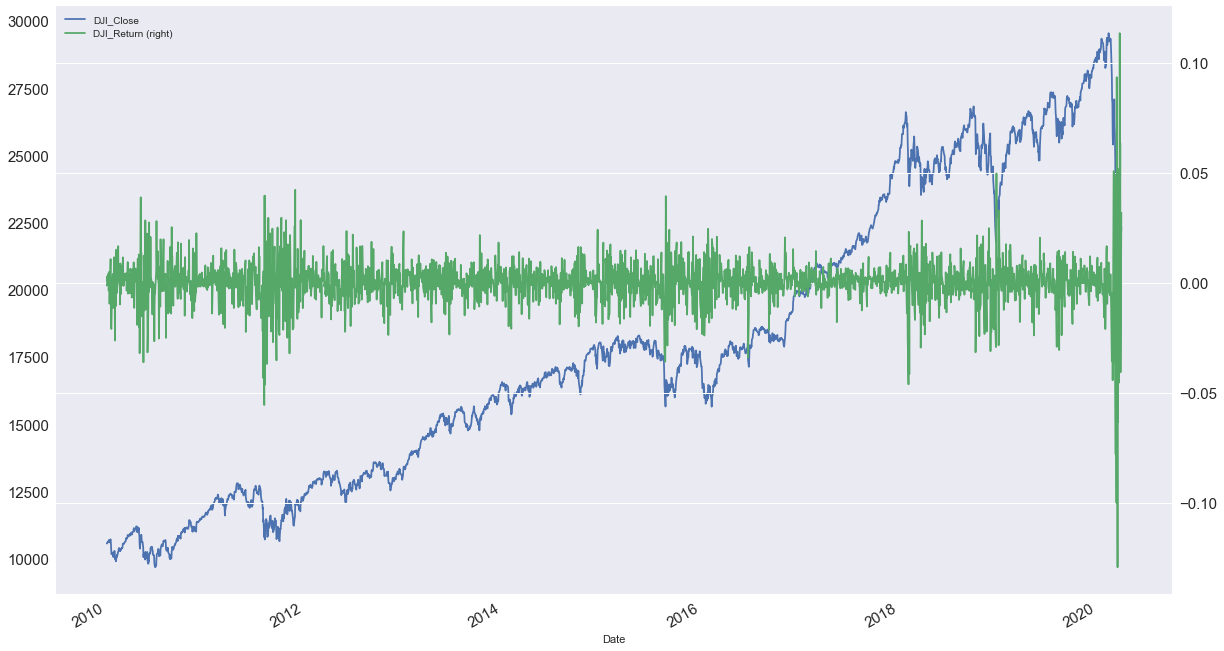

In [81]:
df.plot(figsize=(20,12),  secondary_y="DJI_Return",  mark_right = True,fontsize=15)

### Backtesting a simple Mometum Strategy

Positions:
<br>
+1: Investing in DJI (long position)
<br>
-1: Short Selling in DJI (short position)
<br>
0: No position (neutral)

<br>
<br>
Strategies:
<br>
-Buy and Hold (Basic Strategy - pasive): Initially Investing into DJI and do nothing (Position: 1 on any given day)
<br>
<br>
<br>
-Simple Momentum (activr strategy to be tested)
<br>
a) Investing (+1) into DJI tomorrow if today's return was positive
<br>
b) Short selling (-1) DJI tomorrow if today's return was negative

In [82]:
df

,DJI_Close,DJI_Return
Date,,
2010-01-05,10572.019531,-0.001128
2010-01-06,10573.679688,0.000157
2010-01-07,10606.860352,0.003138
2010-01-08,10618.190430,0.001068
2010-01-11,10663.990234,0.004313
...,...,...
2020-03-24,20704.910156,0.113650
2020-03-25,21200.550781,0.023938
2020-03-26,22552.169922,0.063754


In [83]:
df["Position"] = np.sign(df["DJI_Return"])

In [84]:
df

,DJI_Close,DJI_Return,Position
Date,,,
2010-01-05,10572.019531,-0.001128,-1.0
2010-01-06,10573.679688,0.000157,1.0
2010-01-07,10606.860352,0.003138,1.0
2010-01-08,10618.190430,0.001068,1.0
2010-01-11,10663.990234,0.004313,1.0
...,...,...,...
2020-03-24,20704.910156,0.113650,1.0
2020-03-25,21200.550781,0.023938,1.0
2020-03-26,22552.169922,0.063754,1.0


In [85]:
df["Strategy_Ret"] = df['Position'].shift() * df["DJI_Return"]

In [86]:
df

,DJI_Close,DJI_Return,Position,Strategy_Ret
Date,,,,
2010-01-05,10572.019531,-0.001128,-1.0,NaN
2010-01-06,10573.679688,0.000157,1.0,-0.000157
2010-01-07,10606.860352,0.003138,1.0,0.003138
2010-01-08,10618.190430,0.001068,1.0,0.001068
2010-01-11,10663.990234,0.004313,1.0,0.004313
...,...,...,...,...
2020-03-24,20704.910156,0.113650,1.0,-0.113650
2020-03-25,21200.550781,0.023938,1.0,0.023938
2020-03-26,22552.169922,0.063754,1.0,0.063754


In [87]:
df.Strategy_Ret.add(1,fill_value=0).cumprod()

Date
2010-01-05    1.000000
2010-01-06    0.999843
2010-01-07    1.002981
2010-01-08    1.004052
2010-01-11    1.008383
                ...   
2020-03-24    0.472559
2020-03-25    0.483871
2020-03-26    0.514720
2020-03-27    0.493827
2020-03-30    0.478063
Name: Strategy_Ret, Length: 2576, dtype: float64

In [88]:
df["Strategy"] = df.Strategy_Ret.add(1,fill_value=0).cumprod() #*df.iloc[0.0]

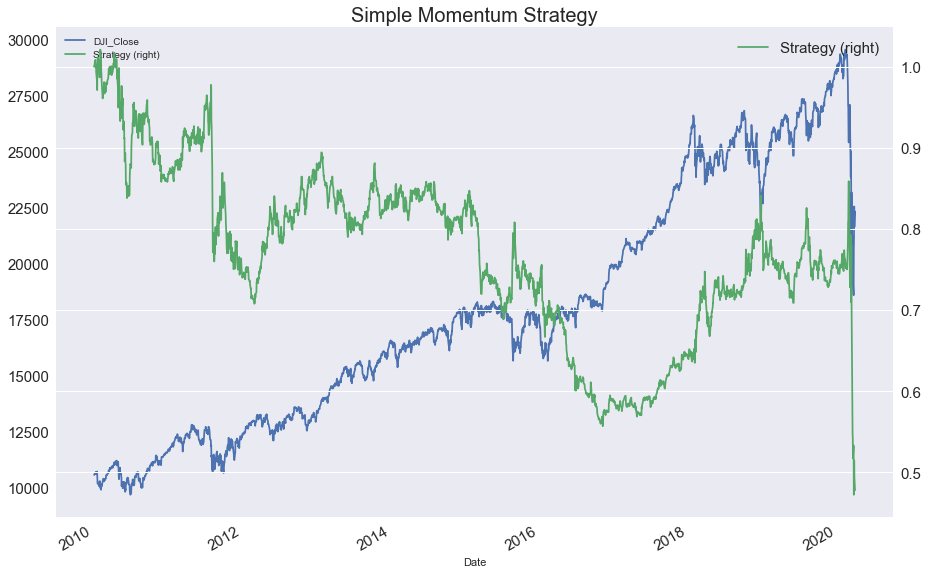

In [97]:
df[["DJI_Close", "Strategy"]].plot(figsize=(15,10), secondary_y="Strategy",fontsize=15)
plt.title("Simple Momentum Strategy", fontsize=20)
plt.legend(fontsize=15)
plt.show()

In [92]:
df

,DJI_Close,DJI_Return,Position,Strategy_Ret,Strategy
Date,,,,,
2010-01-05,10572.019531,-0.001128,-1.0,NaN,1.000000
2010-01-06,10573.679688,0.000157,1.0,-0.000157,0.999843
2010-01-07,10606.860352,0.003138,1.0,0.003138,1.002981
2010-01-08,10618.190430,0.001068,1.0,0.001068,1.004052
2010-01-11,10663.990234,0.004313,1.0,0.004313,1.008383
...,...,...,...,...,...
2020-03-24,20704.910156,0.113650,1.0,-0.113650,0.472559
2020-03-25,21200.550781,0.023938,1.0,0.023938,0.483871
2020-03-26,22552.169922,0.063754,1.0,0.063754,0.514720


In [98]:
def summary_ann(returns):
    summary = returns.agg(["mean","std"]).T
    summary["Return"]= summary["mean"]*252
    summary["Risk"] = summary["std"]*np.sqrt(252)
    summary.drop(columns = ["mean", "std"], inplace=True)
    return summary

In [100]:
summary_ann(df[["DJI_Return", "Strategy_Ret"]])

,Return,Risk
DJI_Return,0.087212,0.167896
Strategy_Ret,-0.057966,0.167946
